In [57]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [40]:
#load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [41]:
#split train - val dataset
splited_x_train, x_val, splited_y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [42]:
#checking dataset shape
print("Feature matrix (x_train):", splited_x_train.shape)
print("Target matrix (y_train):", splited_y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (40000, 32, 32, 3)
Target matrix (y_train): (40000, 1)
Feature matrix (x_test): (10000, 32, 32, 3)
Target matrix (y_test): (10000, 1)


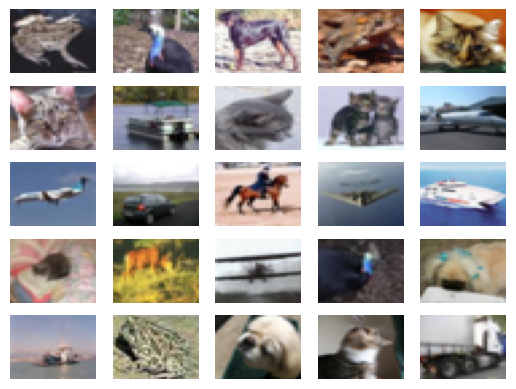

In [43]:
#load first 25 images
fig, ax = plt.subplots(5, 5)

k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(splited_x_train[k], aspect='auto')
        ax[i][j].set_axis_off()
        k += 1

plt.show()

In [44]:
#normalizing input
normalized_splited_x_train = splited_x_train / 255.0
normalized_x_val = x_val / 255.0
normalized_x_test = x_test / 255.0

In [ ]:
#data augmention
datagen = ImageDataGenerator(
    rotation_range=10,        
    width_shift_range=0.1,    
    height_shift_range=0.1,   
    zoom_range=0.2,           
    horizontal_flip=True,     
    fill_mode='nearest'       
)

In [46]:
#Creating a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,978 (2.49 MB)

 Trainable params: 651,978 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [49]:
#train the model
datagen.fit(splited_x_train)

history = model.fit(datagen.flow(normalized_splited_x_train, splited_y_train, batch_size = 64),
          epochs=30,
          validation_data = (normalized_x_val, y_val),
          callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.2468 - loss: 1.9952 - val_accuracy: 0.4799 - val_loss: 1.3943
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4401 - loss: 1.5212 - val_accuracy: 0.5397 - val_loss: 1.3039
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5177 - loss: 1.3271 - val_accuracy: 0.5820 - val_loss: 1.1218
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5632 - loss: 1.2281 - val_accuracy: 0.6463 - val_loss: 1.0070
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.5853 - loss: 1.1838 - val_accuracy: 0.6517 - val_loss: 0.9747
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6149 - loss: 1.0930 - val_accuracy: 0.6833 - val_loss: 0.8820
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6338 - loss: 1.0534 - val_accuracy: 0.6986 - val_loss: 0.8433
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6446 - loss: 1.0186 - 

In [50]:
# Evaluating the model on test data
results = model.evaluate(normalized_x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.6378234028816223, 0.7768999934196472]


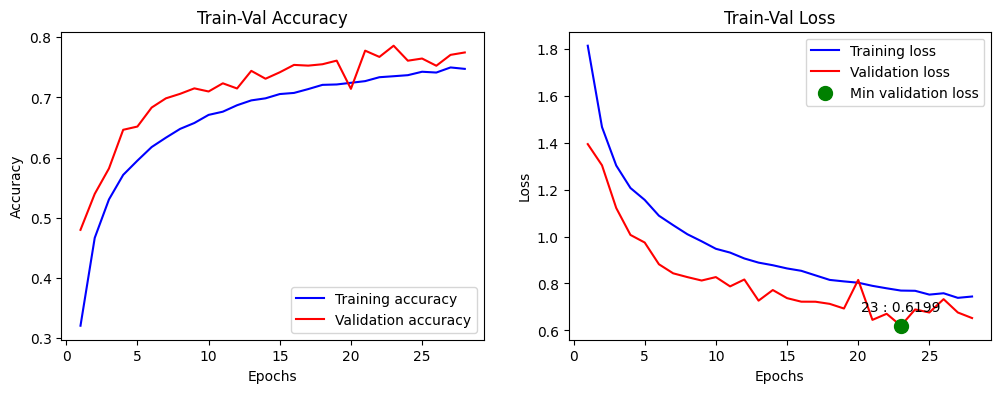

In [51]:
#plotting results
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

min_val_loss = min(val_loss)
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color = "blue", label = "Training accuracy")
plt.plot(epochs, val_accuracy, color = "red", label = "Validation accuracy")
plt.title("Train-Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color = "blue", label = "Training loss")
plt.plot(epochs, val_loss, color = "red", label = "Validation loss")
plt.scatter([min_val_loss_epoch], [min_val_loss],
            color= "green", s = 100, label = "Min validation loss", zorder = 5)
plt.text(min_val_loss_epoch, min_val_loss + 0.05, f"{min_val_loss_epoch} : {min_val_loss:.4f}", ha = "center",
         va = "bottom", fontsize = 10, color = "black")
plt.title("Train-Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [52]:
prediction = model.predict(normalized_x_test)
classed_prediction = np.argmax(prediction, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [53]:
print(classed_prediction)

[5 8 8 ... 5 1 7]


In [54]:
label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Which picture do you want to test? 
18
Predicted: horse
Actual: horse


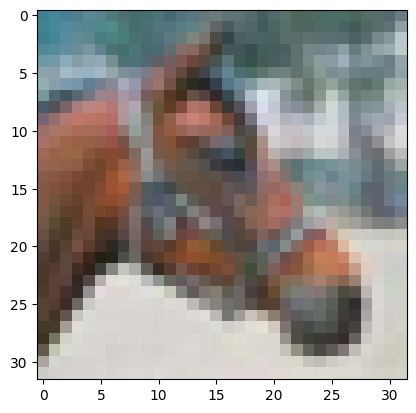

In [56]:
pic_number = input("Which picture do you want to test? \n")

predicted = classed_prediction[int(pic_number) - 1]
actual = y_test[int(pic_number) - 1, 0]

print("Predicted:", label[predicted])
print("Actual:", label[actual])

plt.imshow(x_test[int(pic_number) - 1])
plt.show()

In [64]:
oneD_y_test = y_test.reshape(len(y_test),)
print(classification_report(oneD_y_test, classed_prediction, target_names = label))

              precision    recall  f1-score   support

    airplane       0.76      0.84      0.80      1000
  automobile       0.85      0.93      0.89      1000
        bird       0.73      0.63      0.68      1000
         cat       0.63      0.59      0.61      1000
        deer       0.80      0.68      0.73      1000
         dog       0.72      0.68      0.70      1000
        frog       0.75      0.85      0.80      1000
       horse       0.81      0.84      0.82      1000
        ship       0.88      0.87      0.88      1000
       truck       0.83      0.86      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000

